In [1]:
from metal.layers.dense import Dense
from metal.layers.softmax import Softmax

from metal.layers.conv2D import Conv2D
from metal.layers.flatten import Flatten
from metal.losses.loss import CrossEntropy
from metal.losses.loss_functions import CrossEntropy as cp
from metal.learners.neuralnetwork import NeuralNetwork
from metal.learners.solver import Solver
from metal.initializers.optimizer_init import OptimizerInitializer, Adam
from metal.initializers.scheduler_init import SchedulerInitializer
from metal.layers.pooling import Pool2D
import numpy as np
from metal.utils.functions import to_categorical
from sklearn import datasets
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
import scipy.ndimage as ndi
import matplotlib.pyplot as plt


In [2]:
def imgs_trans(imgs_in,size):
    factor = size/imgs_in.shape[1]
    imgs_out = ndi.zoom(imgs_in, (1, factor, factor, 1), order=2)
    print(imgs_out.shape)
    return imgs_out

def train_test_split(X, y, test_size=0.5, shuffle=True, seed=None):
    """ Split the data into train and test sets """
    if shuffle:
        X, y = shuffle_data(X, y, seed)
    # Split the training data from test data in the ratio specified in
    # test_size
    split_i = len(y) - int(len(y) // (1 / test_size))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]

    return X_train, X_test, y_train, y_test

def shuffle_data(X, y, seed=None):
    """ Random shuffle of the samples in X and y """
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]


In [3]:
#imgs = np.load('../../../downloads/catdog.npy',allow_pickle=True)
#labels = np.load('../../../downloads/catdoglabels.npy',allow_pickle=True)

In [4]:
#fashion_mnist = keras.datasets.fashion_mnist
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
#optimizer = Adam()
#data = datasets.load_digits()
#X = (data.data.reshape(-1, 8, 8, 1)/255.0).astype('float32')
#y = data.target
#loss = CrossEntropy
# Covnet to  one-hot encoding 
#y = to_categorical(y.astype("int"))
#X = imgs_trans(X,28)


In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(X_trainp, y_trainp), (xt, yt) = fashion_mnist.load_data()

#X_trainp=(X_trainp - np.mean(X_trainp))/np.std(X_trainp)
#X_trainp /= X_trainp.sum(axis=1, keepdims=True)

#xt_ = (xt.reshape(-1, 28, 28, 1)/255.0).astype('float32')
X_trainm = (X_trainp.reshape(-1, 28, 28, 1)/255.0).astype('float32')
y_trainm = y_trainp
#X_train = imgs_trans(X_train,28)
y_trainm = to_categorical(y_trainm.astype("int"))


In [7]:
X_trainm.shape,y_trainm.shape
#X.shape,y.shape

((60000, 28, 28, 1), (60000, 10))

In [8]:
#X = imgs
#y = labels

#X = ((imgs[:100])/255.0).astype('float32')
#y = labels[:100]
#X_ = np.fliplr(X)
#X = np.concatenate([X,X_])
#y = np.concatenate([y,y])
#X , y = shuffle_data(X,y,15)
#loss = CrossEntropy
# Covnet to  one-hot encoding
#y = to_categorical(y.astype("int"))
#X = imgs_trans(X,32)
#y = y.reshape(-1,1)
#y.shape, X.shape

In [9]:
X.shape,y.shape

NameError: name 'X' is not defined

In [ ]:
#optimizer = Adam()
#data = datasets.load_digits()
#X = data.data
#y = data.target
#loss = CrossEntropy
# Covnet to  one-hot encoding 
#y = to_categorical(y.astype("int"))

In [10]:
layer = [#Conv2D(16,(3,3),'same',stride=1,optimizer=Adam(),act_fn='relu'),
#Pool2D((2,2),pad='same',optimizer=Adam()),
#Conv2D(16,(3,3),'same',stride=1,optimizer=Adam(),act_fn='relu'),
Flatten(),
Dense(256,act_fn='relu'),
Dense(10),
Softmax()         
]



In [11]:
#layer[0].hyperparameters

In [12]:
#layer[0].change_optimizer('Adam')

In [13]:
#layer[0].hyperparameters

In [14]:
layer[0].hyperparameters

{'layer': 'Flatten',
 'keep_dim': 'first',
 'optimizer': {'cache': {},
  'hyperparameters': {'id': 'SGD',
   'lr': 0.01,
   'momentum': 0.0,
   'clip_norm': None,
   'lr_scheduler': 'ConstantScheduler(lr=0.01)'}}}

In [15]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, seed = 1)
X_train, X_test, y_train, y_test = train_test_split(X_trainm, y_trainm, test_size = 0.4, seed = 9)


In [16]:
X_train.shape,X_test.shape


((36000, 28, 28, 1), (24000, 28, 28, 1))

In [17]:
#X_train = train_images.reshape((-1,28,28,1)).astype('float32')/255.0
#X_test = test_images.reshape((-1,28,28,1)).astype('float32')/255.0
#y_train = to_categorical(train_labels.astype("int"))
#y_test = to_categorical(test_labels.astype("int"))


In [18]:
nn = NeuralNetwork(Adam(),cp(),layers=layer,validation_data=(X_test,y_test))

In [19]:
small_data = {
  'X_train': X_train,
  'y_train':y_train,
  'X_val': X_test,
  'y_val': y_test,
} 
ss =Solver(nn,small_data,num_epochs=15, batch_size=50,
                update_rule='Adam',
                optim_config={
                  'learning_rate': 1e-3,
                },
           checkpoint_name='check_point_1',
                verbose=True, print_every=10)
ss.train()

(Iteration 1 / 10800) loss: 0.389893
Saving checkpoint to "check_point_1_epoch_0.pkl"
(Epoch 0 / 15) train acc: 0.129000; val_acc: 0.126875
(Iteration 11 / 10800) loss: 0.194061
(Iteration 21 / 10800) loss: 0.144271
(Iteration 31 / 10800) loss: 0.127079
(Iteration 41 / 10800) loss: 0.140524
(Iteration 51 / 10800) loss: 0.125705
(Iteration 61 / 10800) loss: 0.099016
(Iteration 71 / 10800) loss: 0.091208
(Iteration 81 / 10800) loss: 0.085037
(Iteration 91 / 10800) loss: 0.104020
(Iteration 101 / 10800) loss: 0.128647
(Iteration 111 / 10800) loss: 0.133807
(Iteration 121 / 10800) loss: 0.093338
(Iteration 131 / 10800) loss: 0.123872
(Iteration 141 / 10800) loss: 0.108878
(Iteration 151 / 10800) loss: 0.121972
(Iteration 161 / 10800) loss: 0.091146
(Iteration 171 / 10800) loss: 0.095083
(Iteration 181 / 10800) loss: 0.124342
(Iteration 191 / 10800) loss: 0.092717
(Iteration 201 / 10800) loss: 0.072887
(Iteration 211 / 10800) loss: 0.094336
(Iteration 221 / 10800) loss: 0.070207
(Iteration 

(Iteration 2031 / 10800) loss: 0.051090
(Iteration 2041 / 10800) loss: 0.073170
(Iteration 2051 / 10800) loss: 0.037879
(Iteration 2061 / 10800) loss: 0.057549
(Iteration 2071 / 10800) loss: 0.059679
(Iteration 2081 / 10800) loss: 0.043914
(Iteration 2091 / 10800) loss: 0.069357
(Iteration 2101 / 10800) loss: 0.037201
(Iteration 2111 / 10800) loss: 0.074219
(Iteration 2121 / 10800) loss: 0.053683
(Iteration 2131 / 10800) loss: 0.060356
(Iteration 2141 / 10800) loss: 0.054968
(Iteration 2151 / 10800) loss: 0.047969
Saving checkpoint to "check_point_1_epoch_3.pkl"
(Epoch 3 / 15) train acc: 0.896000; val_acc: 0.868292
(Iteration 2161 / 10800) loss: 0.061249
(Iteration 2171 / 10800) loss: 0.071172
(Iteration 2181 / 10800) loss: 0.051988
(Iteration 2191 / 10800) loss: 0.042234
(Iteration 2201 / 10800) loss: 0.054095
(Iteration 2211 / 10800) loss: 0.055714
(Iteration 2221 / 10800) loss: 0.073216
(Iteration 2231 / 10800) loss: 0.090261
(Iteration 2241 / 10800) loss: 0.074266
(Iteration 2251 /

(Iteration 4031 / 10800) loss: 0.037394
(Iteration 4041 / 10800) loss: 0.070092
(Iteration 4051 / 10800) loss: 0.054586
(Iteration 4061 / 10800) loss: 0.036110
(Iteration 4071 / 10800) loss: 0.037943
(Iteration 4081 / 10800) loss: 0.059854
(Iteration 4091 / 10800) loss: 0.051401
(Iteration 4101 / 10800) loss: 0.044990
(Iteration 4111 / 10800) loss: 0.042985
(Iteration 4121 / 10800) loss: 0.056821
(Iteration 4131 / 10800) loss: 0.059795
(Iteration 4141 / 10800) loss: 0.037240
(Iteration 4151 / 10800) loss: 0.074454
(Iteration 4161 / 10800) loss: 0.045851
(Iteration 4171 / 10800) loss: 0.064390
(Iteration 4181 / 10800) loss: 0.031382
(Iteration 4191 / 10800) loss: 0.050092
(Iteration 4201 / 10800) loss: 0.034539
(Iteration 4211 / 10800) loss: 0.071059
(Iteration 4221 / 10800) loss: 0.051245
(Iteration 4231 / 10800) loss: 0.064125
(Iteration 4241 / 10800) loss: 0.040568
(Iteration 4251 / 10800) loss: 0.022505
(Iteration 4261 / 10800) loss: 0.041533
(Iteration 4271 / 10800) loss: 0.070707


(Iteration 6041 / 10800) loss: 0.043099
(Iteration 6051 / 10800) loss: 0.063573
(Iteration 6061 / 10800) loss: 0.033490
(Iteration 6071 / 10800) loss: 0.031642
(Iteration 6081 / 10800) loss: 0.057615
(Iteration 6091 / 10800) loss: 0.035147
(Iteration 6101 / 10800) loss: 0.043947
(Iteration 6111 / 10800) loss: 0.036481
(Iteration 6121 / 10800) loss: 0.028990
(Iteration 6131 / 10800) loss: 0.042883
(Iteration 6141 / 10800) loss: 0.036938
(Iteration 6151 / 10800) loss: 0.050502
(Iteration 6161 / 10800) loss: 0.026424
(Iteration 6171 / 10800) loss: 0.060410
(Iteration 6181 / 10800) loss: 0.043477
(Iteration 6191 / 10800) loss: 0.029002
(Iteration 6201 / 10800) loss: 0.045435
(Iteration 6211 / 10800) loss: 0.047030
(Iteration 6221 / 10800) loss: 0.043620
(Iteration 6231 / 10800) loss: 0.011771
(Iteration 6241 / 10800) loss: 0.034976
(Iteration 6251 / 10800) loss: 0.078019
(Iteration 6261 / 10800) loss: 0.044911
(Iteration 6271 / 10800) loss: 0.029354
(Iteration 6281 / 10800) loss: 0.054843


(Iteration 8011 / 10800) loss: 0.034895
(Iteration 8021 / 10800) loss: 0.053768
(Iteration 8031 / 10800) loss: 0.038750
(Iteration 8041 / 10800) loss: 0.029228
(Iteration 8051 / 10800) loss: 0.034865
(Iteration 8061 / 10800) loss: 0.025705
(Iteration 8071 / 10800) loss: 0.030437
(Iteration 8081 / 10800) loss: 0.027690
(Iteration 8091 / 10800) loss: 0.030943
(Iteration 8101 / 10800) loss: 0.024968
(Iteration 8111 / 10800) loss: 0.030986
(Iteration 8121 / 10800) loss: 0.051072
(Iteration 8131 / 10800) loss: 0.028323
(Iteration 8141 / 10800) loss: 0.036959
(Iteration 8151 / 10800) loss: 0.043711
(Iteration 8161 / 10800) loss: 0.065276
(Iteration 8171 / 10800) loss: 0.031360
(Iteration 8181 / 10800) loss: 0.017360
(Iteration 8191 / 10800) loss: 0.050136
(Iteration 8201 / 10800) loss: 0.015622
(Iteration 8211 / 10800) loss: 0.039183
(Iteration 8221 / 10800) loss: 0.029630
(Iteration 8231 / 10800) loss: 0.044226
(Iteration 8241 / 10800) loss: 0.049453
(Iteration 8251 / 10800) loss: 0.034357


(Iteration 10021 / 10800) loss: 0.018236
(Iteration 10031 / 10800) loss: 0.032962
(Iteration 10041 / 10800) loss: 0.036005
(Iteration 10051 / 10800) loss: 0.029862
(Iteration 10061 / 10800) loss: 0.033250
(Iteration 10071 / 10800) loss: 0.062439
Saving checkpoint to "check_point_1_epoch_14.pkl"
(Epoch 14 / 15) train acc: 0.927000; val_acc: 0.883833
(Iteration 10081 / 10800) loss: 0.043396
(Iteration 10091 / 10800) loss: 0.037294
(Iteration 10101 / 10800) loss: 0.026273
(Iteration 10111 / 10800) loss: 0.041936
(Iteration 10121 / 10800) loss: 0.072125
(Iteration 10131 / 10800) loss: 0.024729
(Iteration 10141 / 10800) loss: 0.033676
(Iteration 10151 / 10800) loss: 0.056331
(Iteration 10161 / 10800) loss: 0.021974
(Iteration 10171 / 10800) loss: 0.015366
(Iteration 10181 / 10800) loss: 0.056111
(Iteration 10191 / 10800) loss: 0.027634
(Iteration 10201 / 10800) loss: 0.028995
(Iteration 10211 / 10800) loss: 0.049768
(Iteration 10221 / 10800) loss: 0.012189
(Iteration 10231 / 10800) loss: 0.

In [21]:
ss.best_val_acc

0.886125

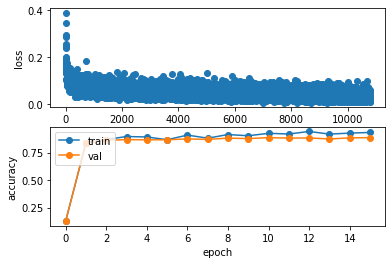

In [25]:
plt.subplot(2, 1, 1)
plt.plot(ss.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(ss.train_acc_history, '-o')
plt.plot(ss.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

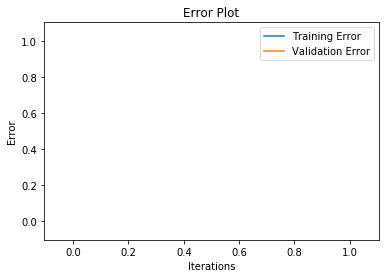

Accuracy: 0.7


0.7

In [141]:
nn.eval(X_test, y_test)


In [16]:
from metal.utils.utils import pad2D

In [29]:
a,a_=pad2D(X_train, 'same', (3,3), 1, 0)
output_height = (X_train.shape[1] + np.sum((1,1)) - 3 )/ 1 + 1
output_height

8.0

In [34]:
vv=layer[0].forward(X_train,False)
ff=layer[1].forward(vv,False)
layer[0].parameters['W'].shape

(3, 3, 1, 3)

In [19]:
train_err, val_err = nn.fit(X_train, y_train, n_epochs=10, batch_size=64)


Training: 100% [------------------------------------------------] Time: 0:00:07


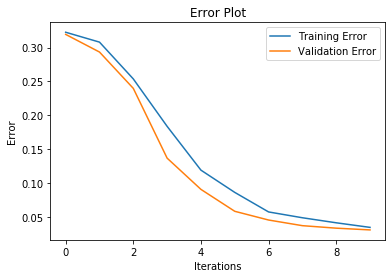

Accuracy: 0.9456824512534819


0.9456824512534819

In [20]:
nn.eval(X_test, y_test)


In [96]:
from builtins import range
from past.builtins import xrange

from math import sqrt, ceil
import numpy as np

def visualize_grid(Xs, ubound=255.0, padding=1):
    """
    Reshape a 4D tensor of image data to a grid for easy visualization.
    Inputs:
    - Xs: Data of shape (N, H, W, C)
    - ubound: Output grid will have values scaled to the range [0, ubound]
    - padding: The number of blank pixels between elements of the grid
    """
    (N, H, W, C) = Xs.shape
    grid_size = int(ceil(sqrt(N)))
    grid_height = H * grid_size + padding * (grid_size - 1)
    grid_width = W * grid_size + padding * (grid_size - 1)
    grid = np.zeros((grid_height, grid_width, C))
    next_idx = 0
    y0, y1 = 0, H
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = Xs[next_idx]
                low, high = np.min(img), np.max(img)
                grid[y0:y1, x0:x1] = ubound * (img - low) / (high - low)
                # grid[y0:y1, x0:x1] = Xs[next_idx]
                next_idx += 1
            x0 += W + padding
            x1 += W + padding
        y0 += H + padding
        y1 += H + padding
    # grid_max = np.max(grid)
    # grid_min = np.min(grid)
    # grid = ubound * (grid - grid_min) / (grid_max - grid_min)
    return grid

def vis_grid(Xs):
    """ visualize a grid of images """
    (N, H, W, C) = Xs.shape
    A = int(ceil(sqrt(N)))
    G = np.ones((A*H+A, A*W+A, C), Xs.dtype)
    G *= np.min(Xs)
    n = 0
    for y in range(A):
        for x in range(A):
            if n < N:
                G[y*H+y:(y+1)*H+y, x*W+x:(x+1)*W+x, :] = Xs[n,:,:,:]
                n += 1
    # normalize to [0,1]
    maxg = G.max()
    ming = G.min()
    G = (G - ming)/(maxg-ming)
    return G

def vis_nn(rows):
    """ visualize array of arrays of images """
    N = len(rows)
    D = len(rows[0])
    H,W,C = rows[0][0].shape
    Xs = rows[0][0]
    G = np.ones((N*H+N, D*W+D, C), Xs.dtype)
    for y in range(N):
        for x in range(D):
            G[y*H+y:(y+1)*H+y, x*W+x:(x+1)*W+x, :] = rows[y][x]
    # normalize to [0,1]
    maxg = G.max()
    ming = G.min()
    G = (G - ming)/(maxg-ming)
    return G


In [97]:
nn.layers[2].parameters['W'].transpose(2, 0, 1,3).shape

(32, 7, 7, 1)

In [98]:
kk=nn.layers[0].forward(X_test,False)

In [99]:
bb=nn.layers[1].forward(kk,False)

In [100]:
bb.shape

(40, 28, 28, 32)

In [103]:
grid = visualize_grid(nn.layers[1].parameters['W'].transpose(2, 0, 1,3)).reshape(47,47)
plt.imshow(grid.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()

ValueError: cannot reshape array of size 70688 into shape (47,47)

In [61]:
np.sqrt(7)

2.6457513110645907

In [20]:
plt.imshow((X_test[50:51].reshape(8,8)))


NameError: name 'plt' is not defined

In [57]:
print(xt[-100:][55].shape)
vv=xt[-100:][55].reshape(1, 28, 28, 1)
#vvv = imgs_trans(vv,12)
#predictions = nn.predict(vvv)
ooo = nn._forward_pass(vv, retain_derived=False)
list_pred = ooo.flatten().tolist()
list_pred.index(max(list_pred))

(28, 28)


6

In [58]:
import matplotlib.pyplot as plt


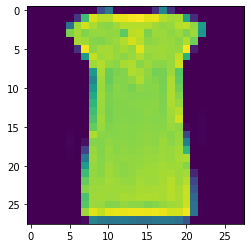

In [59]:
plt.imshow(xt[-100:][55].reshape(28, 28))


In [27]:
y_trainp

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [48]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, ooo[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [16]:
from deprecated.metal.nn import NeuralNetwork
from deprecated.metal.utils import train_test_split, to_categorical, normalize,standardize
from deprecated.metal.utils import get_random_subsets, shuffle_data, Plot
from deprecated.metal.utils.data_operation import accuracy_score
from deprecated.metal.optimizers import StochasticGradientDescent,Adam
from deprecated.metal.loss_functions import CrossEntropy
from deprecated.metal.utils.misc import bar_widgets
from deprecated.metal.layers.dropout import Dropout

from deprecated.metal.layers.batchnormalization_ import BatchNormalization
from deprecated.metal.layers.dense import Dense
from deprecated.metal.layers.conv2D import Conv2D
from deprecated.metal.layers.flatten import Flatten
from deprecated.metal.layers.layer import Activation
from autograd.tensor import Tensor
from autograd.parameter import Parameter
from deprecated.metal.models.convnet import ConvNet
import h5py

In [17]:
from __future__ import print_function
from sklearn import datasets
import matplotlib.pyplot as plt
import math 
import numpy as np
import PIL
from PIL import Image
import urllib
from skimage.transform import resize

In [18]:

import numpy as np
import scipy.ndimage as ndi

def img_tran(imgs_in,size):
    factor = size/imgs_in.shape[1]
    imgs_out = ndi.zoom(imgs_in, (1, factor, factor, 1), order=2)
    print(imgs_out.shape)
    return imgs_out

In [19]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [20]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (_, _) = fashion_mnist.load_data()

X_train = X_train[:10000].reshape(10000, 28, 28, 1)
y_train = y_train[:10000]
X_train = img_tran(X_train,12)

(10000, 12, 12, 1)


In [21]:
y_train = to_categorical(y_train.astype("int"))


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.4, seed = 9)


In [23]:
X_train.shape,X_test.shape


((6000, 12, 12, 1), (4000, 12, 12, 1))

In [24]:

optimizer = Adam()
loss = CrossEntropy

In [25]:
X_train = X_train.reshape((-1,1,12,12))/255.0
X_test = X_test.reshape((-1,1,12,12))/255.0


In [26]:
X_train = Parameter(X_train, requires_grad=True)
X_test = Parameter(X_test, requires_grad=True)
y_train = Parameter(y_train, requires_grad=True)
y_test = Parameter(y_test, requires_grad=True)

In [27]:
covnet = ConvNet(optimizer=optimizer, loss=loss,  validation_data=(X_test,y_test))


In [28]:
covnet.add(Conv2D(n_filters=16, filter_shape=(3,3), stride=1, input_shape=(1,12,12), padding='same', seed=1))
covnet.add(Activation('relu'))
#covnet.add(Dropout(.25))
#covnet.add(BatchNormalization())

covnet.add(Conv2D(n_filters=16, filter_shape=(3,3), stride=1, padding='same', seed=2))
covnet.add(Flatten(input_shape=(1,12,12)))
#covnet.add(BatchNormalization())
covnet.add(Dense(256, seed=4))
covnet.add(Activation('relu'))
#covnet.add(Dropout(.25))
covnet.add(Dense(10,seed=3))
covnet.add(Activation('softmax'))

In [29]:
train_err, val_err = covnet.fit(X_train, y_train, n_epochs=10, batch_size=82)


KeyboardInterrupt: 

In [15]:
#covnet.eval(X_test, y_test)


In [16]:
imgs = np.load('../../../downloads/catdog.npy',allow_pickle=True)
labels = np.load('../../../downloads/catdoglabels.npy',allow_pickle=True)

In [17]:
X = imgs
y = labels

In [18]:
X[:1].shape

(1, 224, 224, 3)

In [19]:
X_train = Parameter(X[:400].reshape(400,3, 224, 224), requires_grad=True)


In [20]:
def conv_forward_strides(x, w, b, conv_param):
    N, C, H, W = x.shape
    F, _, HH, WW = w.shape
    stride, pad = conv_param['stride'], conv_param['pad']

    # Check dimensions
    #assert (W + 2 * pad - WW) % stride == 0, 'width does not work'
    #assert (H + 2 * pad - HH) % stride == 0, 'height does not work'

    # Pad the input
    p = pad
    x_padded = np.pad(x, ((0, 0), (0, 0), (p, p), (p, p)), mode='constant')

    # Figure out output dimensions
    H += 2 * pad
    W += 2 * pad
    out_h = (H - HH) // stride + 1
    out_w = (W - WW) // stride + 1

    # Perform an im2col operation by picking clever strides
    shape = (C, HH, WW, N, out_h, out_w)
    strides = (H * W, W, 1, C * H * W, stride * W, stride)
    strides = x.itemsize * np.array(strides)
    x_stride = np.lib.stride_tricks.as_strided(x_padded,
                  shape=shape, strides=strides)
    x_cols = np.ascontiguousarray(x_stride)
    x_cols.shape = (C * HH * WW, N * out_h * out_w)

    # Now all our convolutions are a big matrix multiply
    res = w.reshape(F, -1).dot(x_cols) + b.reshape(-1, 1)

    # Reshape the output
    res.shape = (F, N, out_h, out_w)
    out = res.transpose(1, 0, 2, 3)

    # Be nice and return a contiguous array
    # The old version of conv_forward_fast doesn't do this, so for a fair
    # comparison we won't either
    out = np.ascontiguousarray(out)

    cache = (x, w, b, conv_param, x_cols)
    return out, cache

def relu_forward(x):
    """
    Computes the forward pass for a layer of rectified linear units (ReLUs).

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    outt = None
    ###########################################################################
    # TODO: Implement the ReLU forward pass.                                  #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    out = x
    out[out<0] = 0
    pass

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = x
    return out, cache


In [21]:
input_dim=(3, 224, 224)
num_filters=32
filter_size=7
hidden_dim=100 
num_classes=10
weight_scale=1e-3
C, H, W = input_dim

w_ =  weight_scale *np.random.randn(num_filters, C, filter_size, filter_size)
b =np.zeros(num_filters)
conv_param = {'stride': 1, 'pad': (filter_size - 1) // 2}


In [22]:
x = X_train.data.reshape(1,3,224,224)

ValueError: cannot reshape array of size 60211200 into shape (1,3,224,224)

In [23]:
out_,_ = conv_forward_strides(x, w_, b, conv_param)
out =  relu_forward(out_)

NameError: name 'x' is not defined

In [24]:
outt = out[0]
outt.shape

NameError: name 'out' is not defined

In [25]:
plt.imshow(outt[0].reshape(32, 224,224)[0])


NameError: name 'outt' is not defined

In [26]:
c1 = Conv2D(n_filters=1, filter_shape=(3,3), stride=1, input_shape=(3,224,224), padding='same')
c1.initialize()
c1.w.shape

(1, 3, 3, 3)

In [27]:
import time

In [28]:
s = time.time()
vc=c1.forward_pass(X_train,True)
e = time.time()

e-s


2.943350315093994

In [29]:
from metal.layers.conv2D import Conv2D as c2d
from metal.initializers.optimizer_init import Adam as ad


In [30]:
c2 = c2d(1,(3,3),1,stride=1,optimizer=ad(),act_fn='relu')
c2.in_ch = 3
c2._init_params()


In [33]:
import time
xx =X_train.data.reshape(-1,224,224,3)
s = time.time()
oc=c2.forward(xx)
e = time.time()

e-s
oc.dtype

0.19095754623413086


dtype('float32')

In [38]:
c2.gradients["W"].dtype

dtype('float32')

In [ ]:
oc[0].shape,c2.parameters["W"].shape

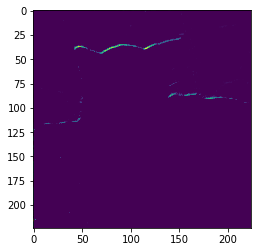

In [29]:
plt.imshow(oc[0].reshape(224,224))


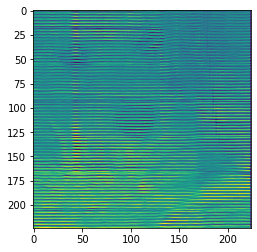

In [64]:
plt.imshow(vc.data[0].reshape(224,224))


In [65]:
vc.data[0].shape

(1, 224, 224)

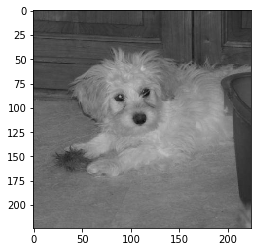

In [66]:
plt.imshow(X[1:2][0])


In [56]:
X[1].shape

(224, 224, 3)

In [30]:
[1,2,3][:2]

[1, 2]

In [32]:
f = Flatten()

In [37]:
out=f.forward(np.random.randn(5,8,8,3))

In [38]:
out.shape

(5, 192)

In [39]:
X_train.shape

(1079, 8, 8, 1)

In [36]:
8*8

64

In [28]:
class A(object):
    def __init__(self,r):
        self.r=r
        
class b(A):
    def __init__(self,x):
        super().__init__(x+1)
        self.x=x
        
    def c(self,k=100):
        super().__init__(k)
        

In [29]:
zz = b(3)
zz.r

4

In [30]:
zz.c()

In [31]:
zz.r

100